In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
exam = pd.read_csv('datasets/exams.csv')
exam.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,69,61,58
52,female,group C,associate's degree,standard,none,73,79,77
66,female,group C,high school,standard,completed,70,82,78
35,female,group E,associate's degree,standard,none,95,99,95
97,male,group E,master's degree,standard,completed,62,48,38


In [3]:
exam.shape

(100, 8)

In [4]:
exam.describe()

,math score,reading score,writing score
count,100.000000,100.000000,100.000000
mean,67.150000,69.180000,67.780000
std,12.797865,13.832607,14.874954
min,36.000000,34.000000,33.000000
25%,56.000000,60.000000,57.750000
50%,68.000000,69.000000,68.500000
75%,76.000000,80.000000,77.250000
max,95.000000,99.000000,100.000000


In [5]:
from sklearn import preprocessing

exam[['math score']] = preprocessing.scale(exam[['math score']].astype('float64'))
exam[['reading score']] = preprocessing.scale(exam[['reading score']].astype('float64'))
exam[['writing score']] = preprocessing.scale(exam[['writing score']].astype('float64'))

In [6]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,some high school,free/reduced,none,0.145284,-0.594336,-0.660793
1,female,group C,some college,free/reduced,completed,-1.582413,-0.303707,0.082430
2,male,group A,high school,standard,none,-0.090311,-1.248250,-0.998622
3,male,group B,some college,standard,none,1.637385,1.440065,0.960785
4,female,group C,master's degree,free/reduced,none,-0.404438,0.931465,0.555391


In [7]:
exam.describe()

,math score,reading score,writing score
count,1.000000e+02,1.000000e+02,1.000000e+02
mean,-4.329870e-16,-5.195844e-16,-7.771561e-17
std,1.005038e+00,1.005038e+00,1.005038e+00
min,-2.446262e+00,-2.556079e+00,-2.349938e+00
25%,-8.756282e-01,-6.669927e-01,-6.776848e-01
50%,6.675193e-02,-1.307829e-02,4.864736e-02
75%,6.950053e-01,7.861504e-01,6.398479e-01
max,2.187107e+00,2.166636e+00,2.176969e+00


In [8]:
exam['parental level of education'].unique()

array(['some high school', 'some college', 'high school',
       "master's degree", "associate's degree", "bachelor's degree"],
      dtype=object)

In [9]:
parental_level_of_education = [
    "some high school",
    "high school",
    "some college",
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

label_encoding = preprocessing.LabelEncoder()
label_encoding = label_encoding.fit(parental_level_of_education)

In [10]:
exam['parental level of education'] = label_encoding.transform(exam['parental level of education'].astype(str))

In [11]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group C,5,free/reduced,none,0.145284,-0.594336,-0.660793
1,female,group C,4,free/reduced,completed,-1.582413,-0.303707,0.082430
2,male,group A,2,standard,none,-0.090311,-1.248250,-0.998622
3,male,group B,4,standard,none,1.637385,1.440065,0.960785
4,female,group C,3,free/reduced,none,-0.404438,0.931465,0.555391


In [12]:
label_encoding.classes_

array(["associate's degree", "bachelor's degree", 'high school',
       "master's degree", 'some college', 'some high school'],
      dtype='<U18')

In [13]:
exam = pd.get_dummies(exam, columns= ['race/ethnicity'])
exam.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,male,5,free/reduced,none,0.145284,-0.594336,-0.660793,0,0,1,0,0
1,female,4,free/reduced,completed,-1.582413,-0.303707,0.082430,0,0,1,0,0
2,male,2,standard,none,-0.090311,-1.248250,-0.998622,1,0,0,0,0
3,male,4,standard,none,1.637385,1.440065,0.960785,0,1,0,0,0
4,female,3,free/reduced,none,-0.404438,0.931465,0.555391,0,0,1,0,0


In [14]:
exam = pd.get_dummies(exam, columns= ['gender',
                                      'lunch',
                                      'test preparation course'])
exam.head()

,parental level of education,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,gender_female,gender_male,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,5,0.145284,-0.594336,-0.660793,0,0,1,0,0,0,1,1,0,0,1
1,4,-1.582413,-0.303707,0.082430,0,0,1,0,0,1,0,1,0,1,0
2,2,-0.090311,-1.248250,-0.998622,1,0,0,0,0,0,1,0,1,0,1
3,4,1.637385,1.440065,0.960785,0,1,0,0,0,0,1,0,1,0,1
4,3,-0.404438,0.931465,0.555391,0,0,1,0,0,1,0,1,0,0,1


In [15]:
from sklearn.model_selection import train_test_split

X = exam.drop('math score', axis= 1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2) 

In [19]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept= True).fit(x_train, y_train)
#may cause perfect multicollinearity
y_pred = linear_model.predict(x_test)

In [20]:
print('training score: ', linear_model.score(x_train, y_train))

training score:  0.8708554882500533


In [21]:
from sklearn.metrics import r2_score

print('testing score: ', r2_score(y_test, y_pred))

testing score:  0.7546564031391125


In [22]:
#to avoid multicollinearity

linear_model = LinearRegression(fit_intercept= False).fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

print('training score: ', linear_model.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.8708554882500533
testing score:  0.7546564031391133


**same r2 score as before when fit_intercept= True**

**the scikit-learn linear regressor accounts for the intercept when using one-hot encoding**

In [23]:
df_pred_actual = pd.DataFrame({
    'predicted': y_pred,
    'actual': y_test
})
df_pred_actual.head()

,predicted,actual
75,1.480536,1.009132
60,0.908196,0.773537
56,0.385769,0.066752
66,-0.026528,0.223815
81,-0.006369,0.537942


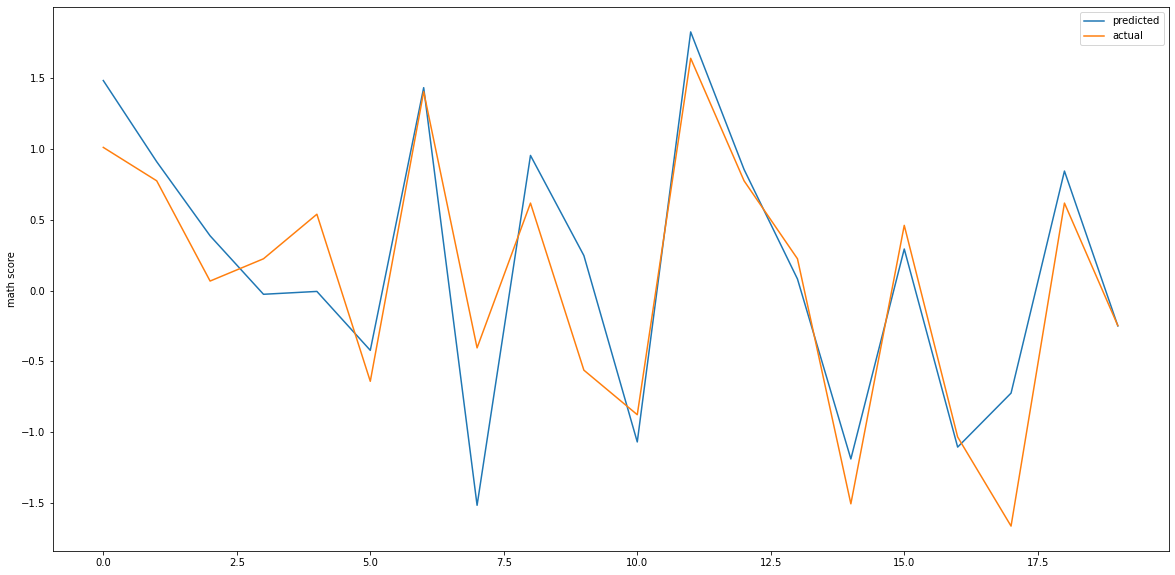

In [25]:
fig, ax = plt.subplots(figsize= (20,10))

plt.plot(y_pred, label= 'predicted')
plt.plot(y_test.values, label= 'actual')

plt.ylabel('math score')
plt.legend()
plt.show()

In [27]:
X = exam.drop(['math score', 'writing score', 'reading score'], axis= 1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

linear_model2 = LinearRegression(fit_intercept= True).fit(x_train, y_train)
y_pred = linear_model2.predict(x_test)

print('training score: ', linear_model2.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.23097618776462148
testing score:  0.019371672758240033


In [28]:
X = exam.drop(['math score', 'writing score'], axis= 1)
Y = exam['math score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2)

linear_model3 = LinearRegression(fit_intercept= True).fit(x_train, y_train)
y_pred = linear_model3.predict(x_test)

print('training score: ', linear_model3.score(x_train, y_train))
print('testing score: ', r2_score(y_test, y_pred))

training score:  0.7675390438848538
testing score:  0.6977686673815793
